# LP1 Assign3

### Disha Chavan             33212

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read csv file

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Shape of data set

In [3]:
df.shape

(400, 9)

### Information about data set

In [4]:
df.info() ;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Check for null values

In [6]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Data visualization

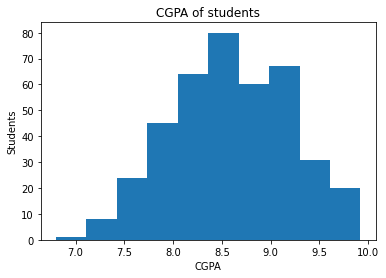

In [7]:
plt.hist(df['CGPA'], bins=10)
plt.xlabel('CGPA')
plt.ylabel('Students')
plt.title('CGPA of students')
plt.show()

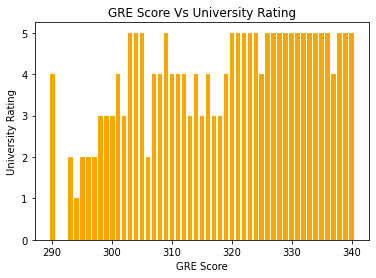

In [8]:
plt.bar(df['GRE Score'], df['University Rating'], color='orange')
plt.xlabel('GRE Score')
plt.ylabel('University Rating')
plt.title('GRE Score Vs University Rating')
plt.show()

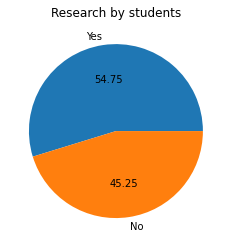

In [9]:
research = df.Research.value_counts()
label1 = ['Yes', 'No']
plt.pie(research, autopct='%.2f',labels=label1)
plt.title('Research by students')
plt.show()

### Change value of output variable

#### If chance is less than 0.8 change value to 0 else 1

In [10]:
df.loc[df['Chance of Admit '] < 0.8,'Chance of Admit'] = 0 
df.loc[df['Chance of Admit '] >= 0.8,'Chance of Admit'] = 1 

### Independant and Dependant variables

In [11]:
X = df[["GRE Score","CGPA"]]
Y = df['Chance of Admit']

### Split dataset into train and test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.75, random_state=123)

In [14]:
x_train.head()

,GRE Score,CGPA
170,312,8.04
297,320,9.11
148,339,9.80
144,325,8.96
12,328,9.10


In [15]:
y_test.head()

234    1.0
42     0.0
303    0.0
155    0.0
342    0.0
Name: Chance of Admit, dtype: float64

### Decision tree Algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [17]:
classifier = DecisionTreeClassifier()

In [18]:
classifier = classifier.fit(x_train, y_train)

In [19]:
y_predict = classifier.predict(x_test)
y_predict

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.])

### Accuracy of the model

In [20]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
confusion_matrix

array([[63,  4],
       [ 7, 26]], dtype=int64)

In [21]:
accuracy = metrics.accuracy_score(y_test,y_predict)
precision = metrics.precision_score(y_test,y_predict)
recall = metrics.recall_score(y_test,y_predict)
f1_score = metrics.f1_score(y_test,y_predict)
print("Accuracy: {0}\nPrecision: {1}\nRecall: {2}\nf1 score: {3}".format(accuracy,precision, recall, f1_score))

Accuracy: 0.89
Precision: 0.8666666666666667
Recall: 0.7878787878787878
f1 score: 0.8253968253968254
